<a href="https://colab.research.google.com/github/jmollan/PUCP/blob/main/Examen_Fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


In [3]:
df = pd.read_excel ("BASE DATA THE COCA COLA COMPANY.xlsx")


In [4]:
print(df.head(20))


     Año  MES        PRODUCTO PRESENTACIÓN  PAIS     ZONA  PRECIO  \
0   2011    1       COCA COLA   2.5 LITROS  PERU  ORIENTE     9.2   
1   2011    1       COCA COLA  MEDIO LITRO  PERU    NORTE     2.9   
2   2011    1           FANTA  MEDIO LITRO  PERU  ORIENTE     2.0   
3   2011    1       COCA COLA  MEDIO LITRO  PERU     LIMA     2.9   
4   2011    1           FANTA     2 LITROS  PERU  ORIENTE     5.4   
5   2011    1           FANTA     2 LITROS  PERU     LIMA     5.4   
6   2011    1      FANTA ZERO  MEDIO LITRO  PERU   CENTRO     2.5   
7   2011    1      FANTA ZERO     2 LITROS  PERU     LIMA     6.0   
8   2011    1      FANTA ZERO     2 LITROS  PERU  ORIENTE     6.0   
9   2011    1  INCA KOLA ZERO  MEDIO LITRO  PERU   CENTRO     3.0   
10  2011    1  INCA KOLA ZERO   2.5 LITROS  PERU    NORTE     9.2   
11  2011    1  INCA KOLA ZERO  MEDIO LITRO  PERU  ORIENTE     3.0   
12  2011    1  COCA COLA ZERO   2.5 LITROS  PERU   CENTRO     9.2   
13  2011    1  COCA COLA ZERO   2.

In [5]:
SALIDAXZONA = df.groupby('ZONA')['VENTAS'].sum()

In [6]:
print(SALIDAXZONA)

ZONA
CENTRO     1.272378e+08
LIMA       1.180202e+08
NORTE      1.335199e+08
ORIENTE    1.611711e+08
SUR        1.350457e+08
Name: VENTAS, dtype: float64


<Axes: xlabel='ZONA'>

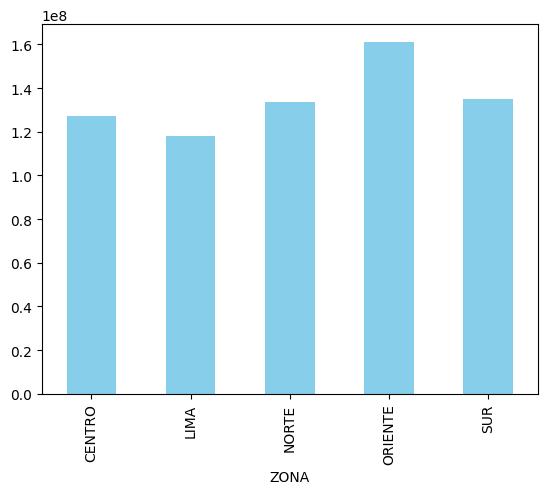

In [8]:
SALIDAXZONA.plot(kind='bar',color='skyblue')


In [9]:
print(SALIDAXZONA)


ZONA
CENTRO     1.272378e+08
LIMA       1.180202e+08
NORTE      1.335199e+08
ORIENTE    1.611711e+08
SUR        1.350457e+08
Name: VENTAS, dtype: float64


In [10]:
PRODUCTOS_UNICOS = df['PRODUCTO'].unique()

In [12]:
print(PRODUCTOS_UNICOS)


['COCA COLA' 'FANTA' 'FANTA ZERO' 'INCA KOLA ZERO' 'COCA COLA ZERO'
 'SPRITE' 'SPRITE ZERO' 'INCA KOLA']


In [15]:
VENTAS_PRODUCTO = df.groupby('PRODUCTO')['VENTAS'].sum()
VENTAS_PRODUCTO_ZONA = df.groupby(['ZONA','PRODUCTO'])['VENTAS'].sum()

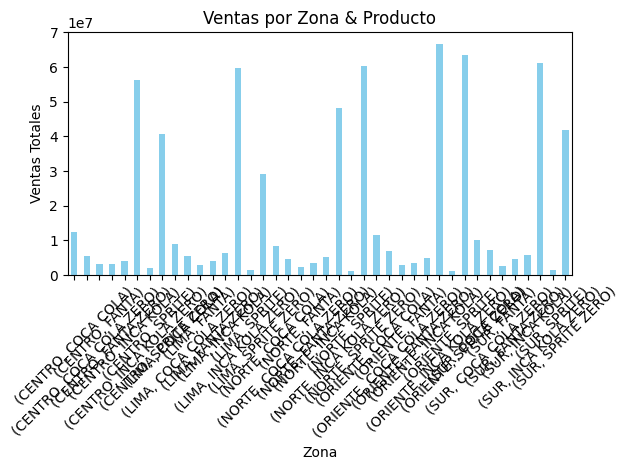

In [16]:
VENTAS_PRODUCTO_ZONA.plot(kind='bar',color='skyblue')
plt.title('Ventas por Zona & Producto')
plt.xlabel('Zona')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.tight_layout()

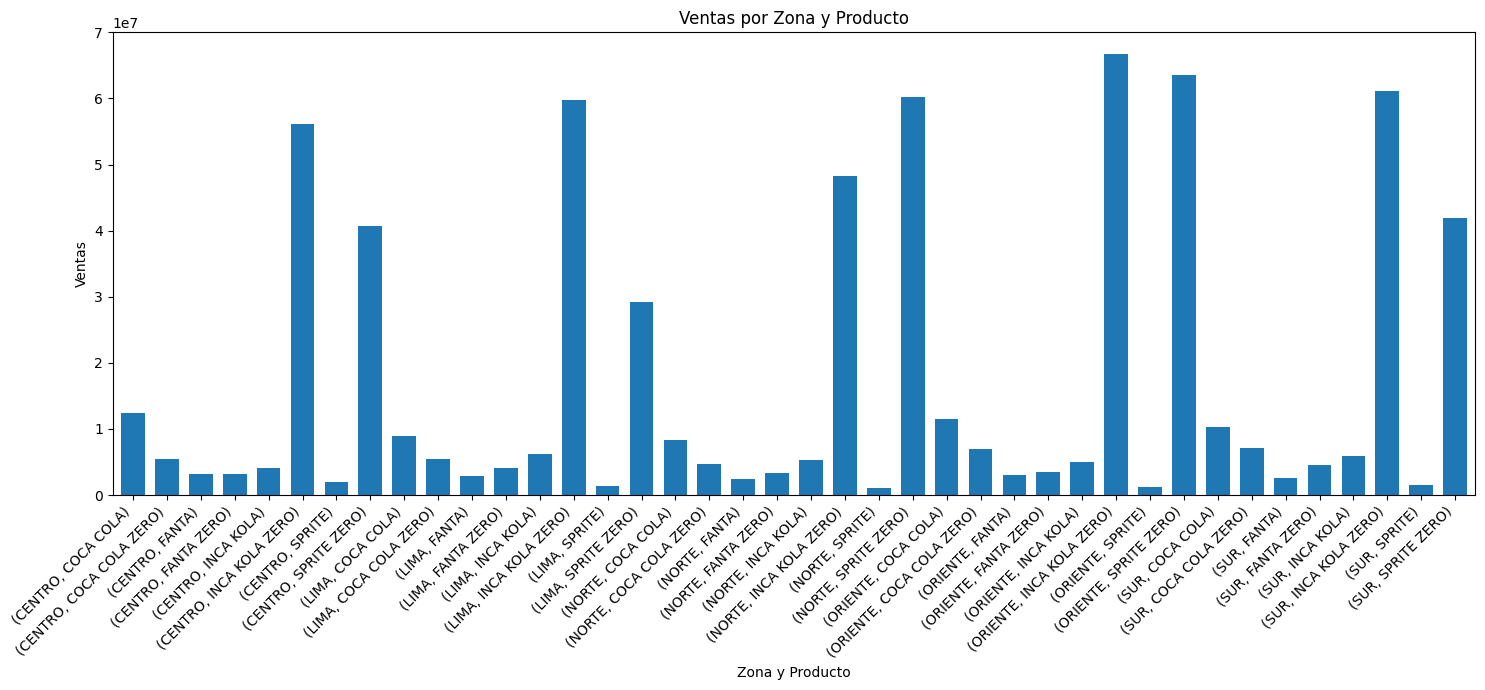

In [17]:
import matplotlib.pyplot as plt

# Agrupar datos
VENTAS_PRODUCTO_ZONA = df.groupby(['ZONA','PRODUCTO'])['VENTAS'].sum()

# Crear gráfico
plt.figure(figsize=(15, 7))  # Ajustar tamaño del gráfico
VENTAS_PRODUCTO_ZONA.plot(kind='bar', width=0.7)  # Gráfico de barras con un ancho de barra de 0.7

# Rotar etiquetas del eje x
plt.xticks(rotation=45, ha='right')

# Título y etiquetas
plt.title('Ventas por Zona y Producto')
plt.xlabel('Zona y Producto')
plt.ylabel('Ventas')

# Mostrar gráfico
plt.tight_layout()
plt.show()


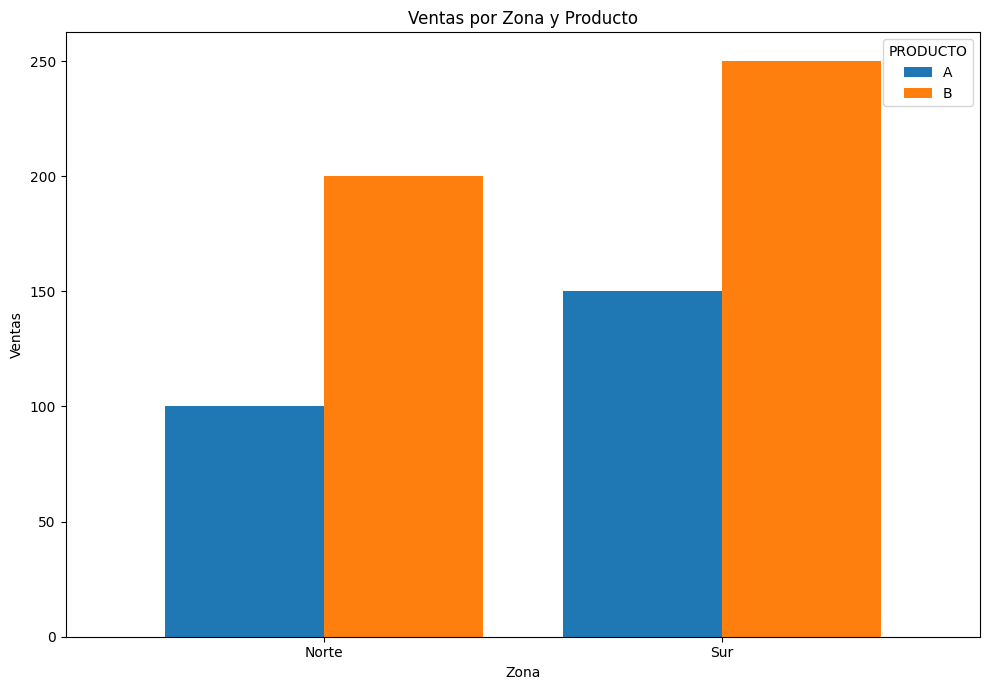

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que tu DataFrame original tiene una estructura similar a esta:
data = {
    'ZONA': ['Norte', 'Norte', 'Sur', 'Sur'],
    'PRODUCTO': ['A', 'B', 'A', 'B'],
    'VENTAS': [100, 200, 150, 250]
}
df = pd.DataFrame(data)

# Agrupa y reestructura el DataFrame
pivot_df = df.pivot(index='ZONA', columns='PRODUCTO', values='VENTAS')

# Gráfico de barras agrupadas
ax = pivot_df.plot(kind='bar', figsize=(10, 7), width=0.8)

# Título y etiquetas
plt.title('Ventas por Zona y Producto')
plt.xlabel('Zona')
plt.ylabel('Ventas')
plt.xticks(rotation=0)  # Asegurarse de que las etiquetas no estén rotadas
plt.tight_layout()

plt.show()


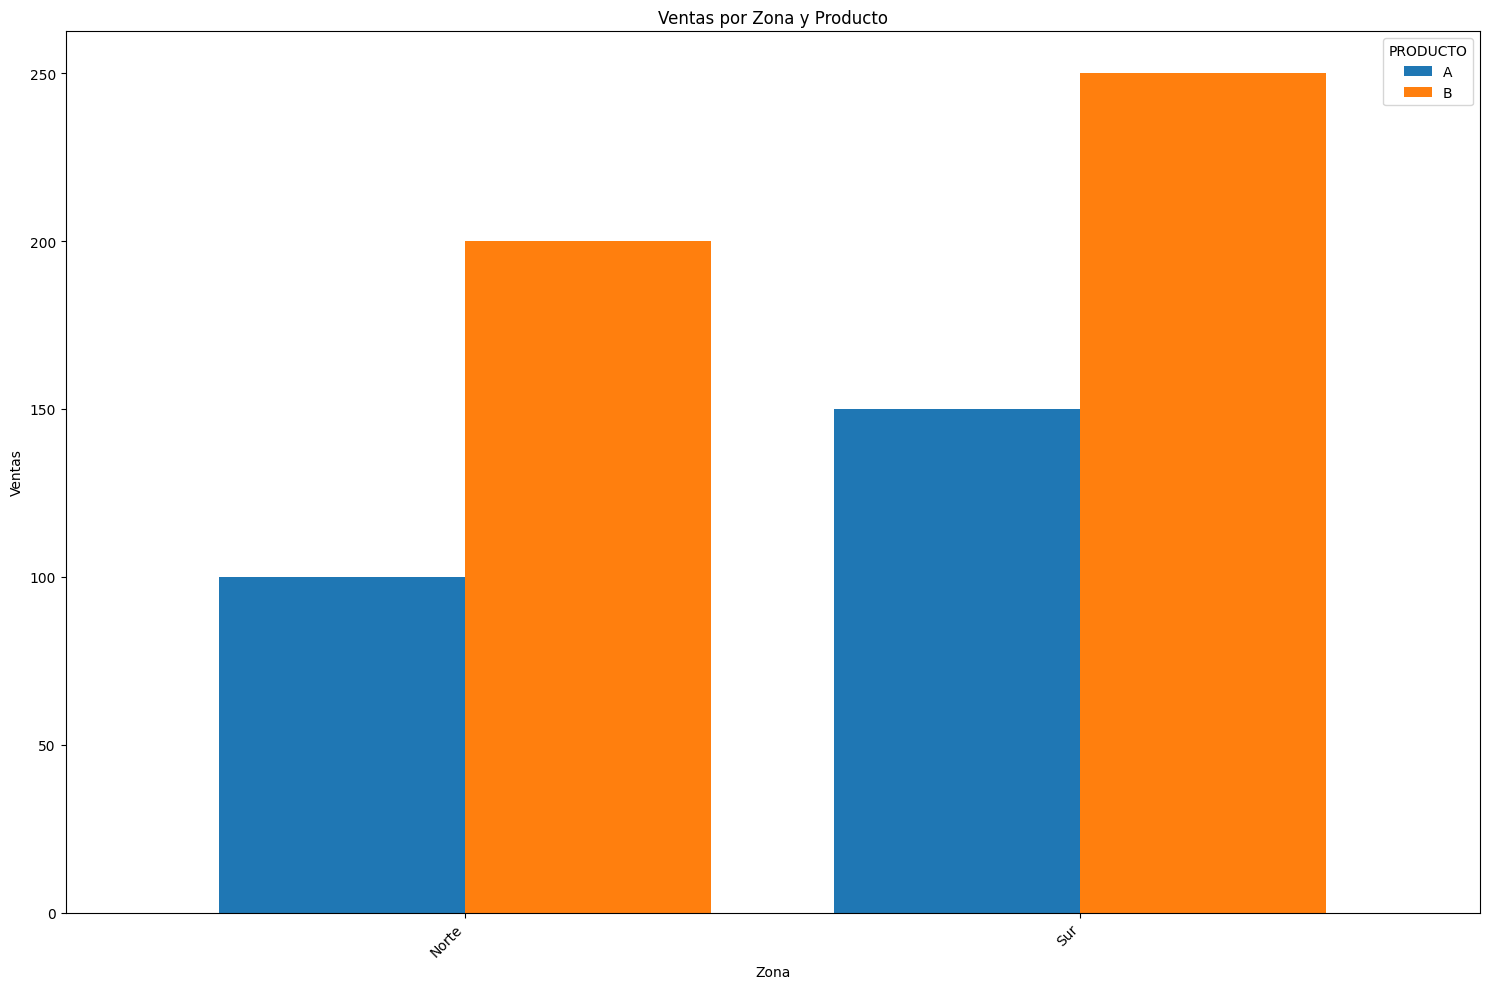

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar datos y reestructurar el DataFrame
pivot_df = df.groupby(['ZONA', 'PRODUCTO'])['VENTAS'].sum().unstack()

# Gráfico de barras agrupadas
ax = pivot_df.plot(kind='bar', figsize=(15, 10), width=0.8)

# Título y etiquetas
plt.title('Ventas por Zona y Producto')
plt.xlabel('Zona')
plt.ylabel('Ventas')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor visualización
plt.tight_layout()

plt.show()


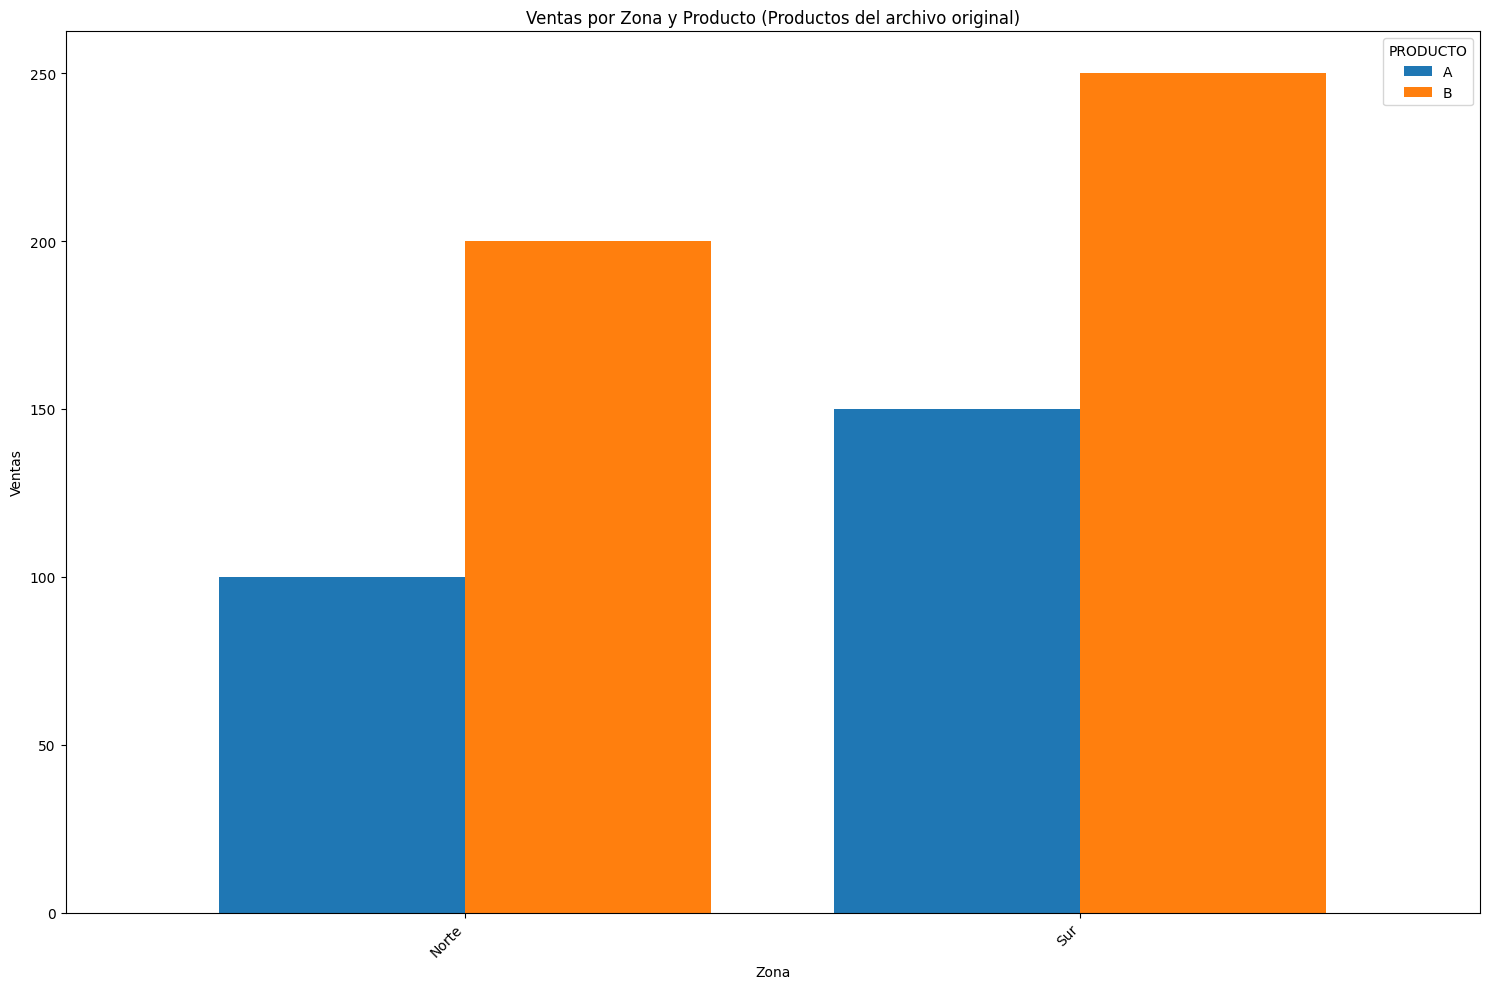

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar datos y reestructurar el DataFrame
pivot_df = df.groupby(['ZONA', 'PRODUCTO'])['VENTAS'].sum().unstack()

# Filtrar el DataFrame para incluir solo los productos que están presentes en el DataFrame original
productos_presentes = df['PRODUCTO'].unique()
filtered_pivot_df = pivot_df[productos_presentes]

# Gráfico de barras agrupadas
ax = filtered_pivot_df.plot(kind='bar', figsize=(15, 10), width=0.8)

# Título y etiquetas
plt.title('Ventas por Zona y Producto (Productos del archivo original)')
plt.xlabel('Zona')
plt.ylabel('Ventas')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor visualización
plt.tight_layout()

plt.show()


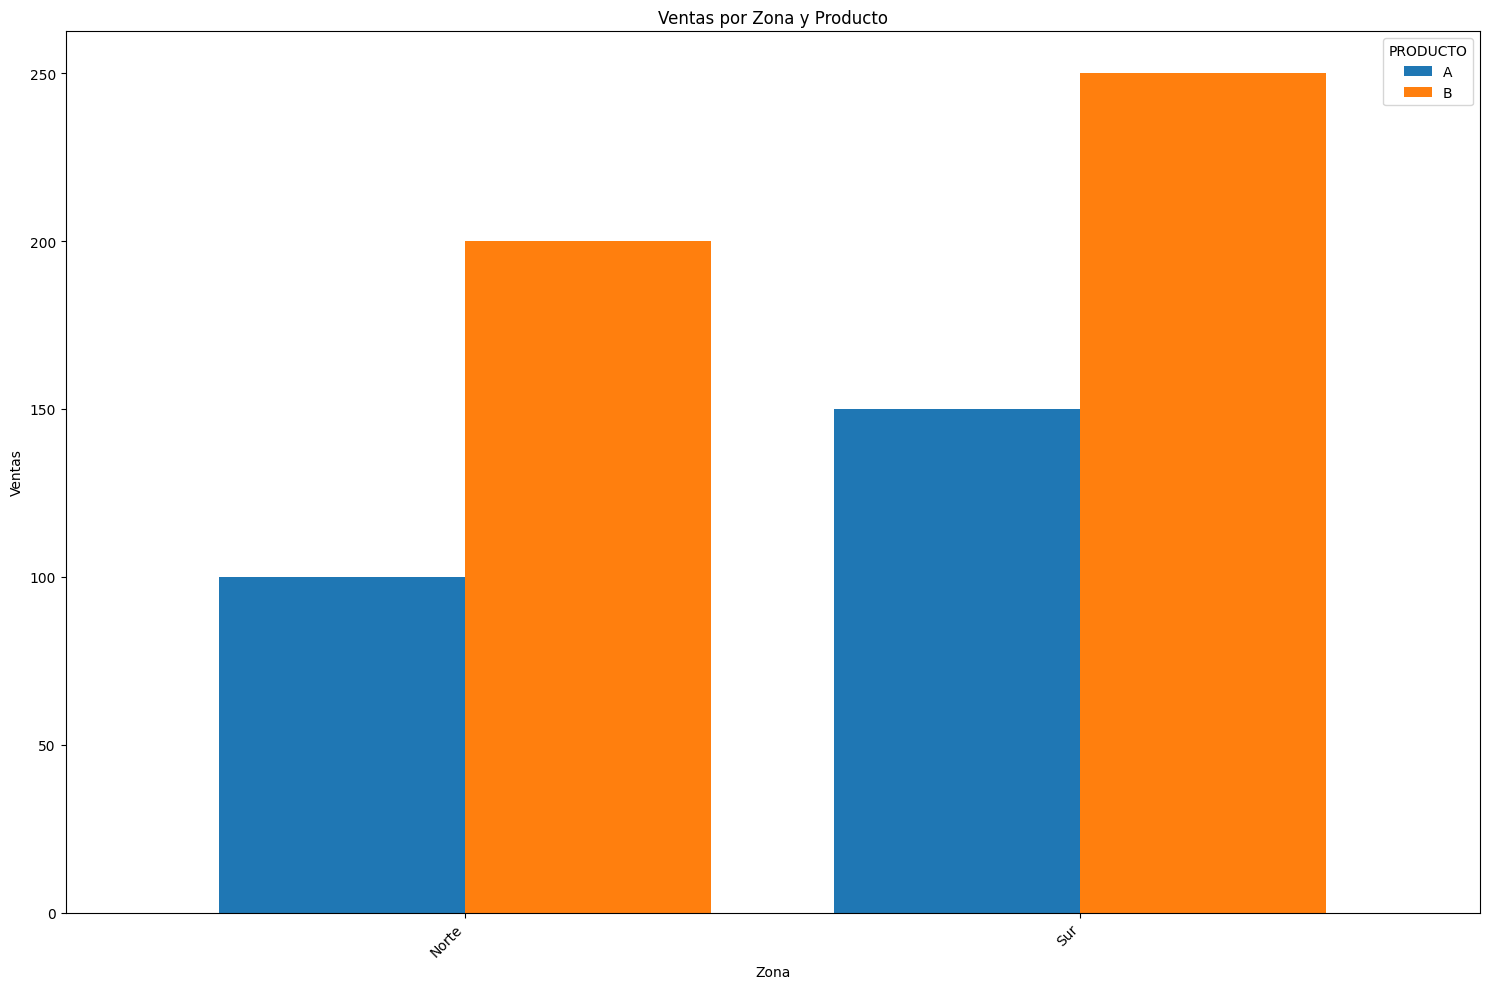

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar datos y reestructurar el DataFrame
pivot_df = df.groupby(['ZONA', 'PRODUCTO'])['VENTAS'].sum().unstack()

# Gráfico de barras agrupadas
ax = pivot_df.plot(kind='bar', figsize=(15, 10), width=0.8)

# Título y etiquetas
plt.title('Ventas por Zona y Producto')
plt.xlabel('Zona')
plt.ylabel('Ventas')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor visualización
plt.tight_layout()

plt.show()


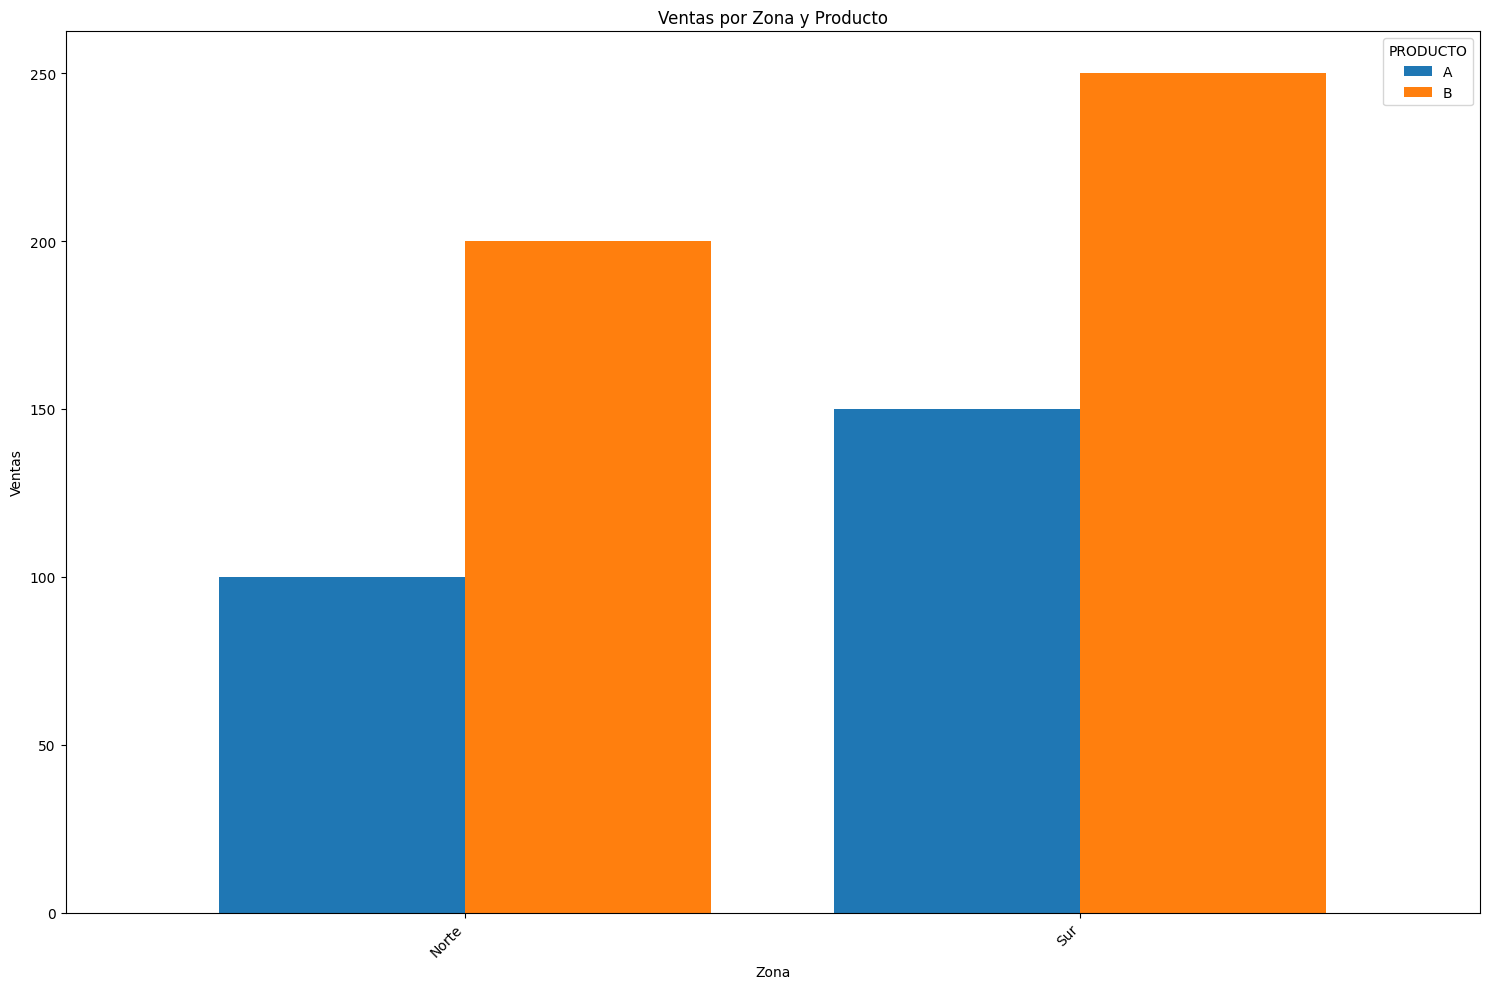

In [22]:
# Agrupar datos y reestructurar el DataFrame
pivot_df = df.groupby(['ZONA', 'PRODUCTO'])['VENTAS'].sum().unstack()

# Gráfico de barras agrupadas
ax = pivot_df.plot(kind='bar', figsize=(15, 10), width=0.8)

# Título y etiquetas
plt.title('Ventas por Zona y Producto')
plt.xlabel('Zona')
plt.ylabel('Ventas')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor visualización
plt.tight_layout()

plt.show()


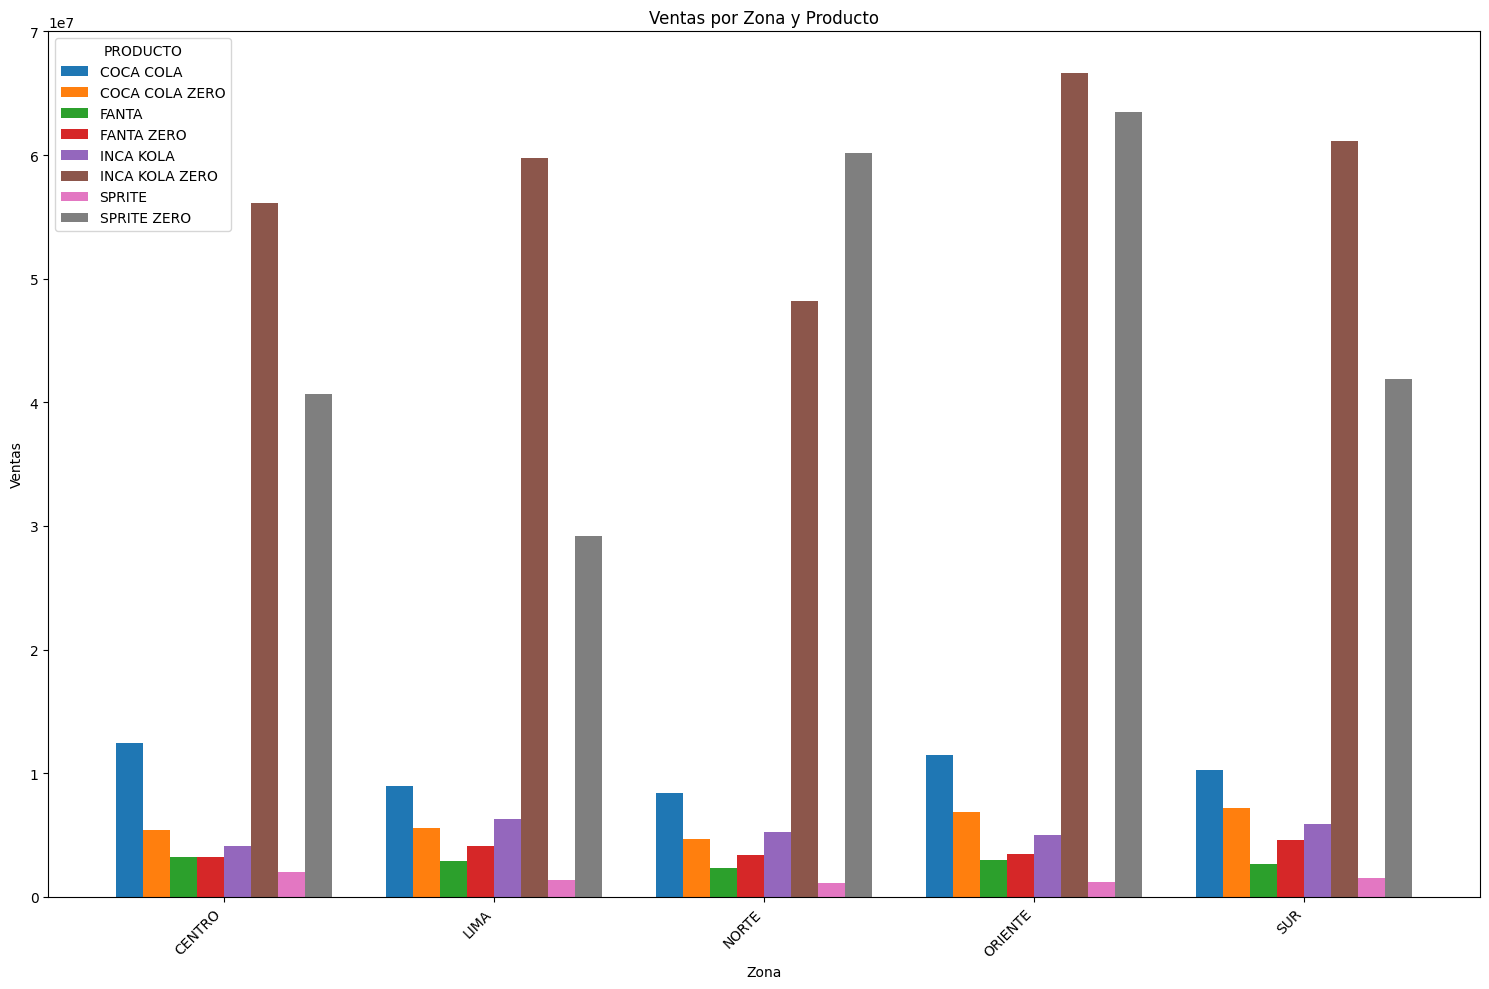

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Tu código inicial
df = pd.read_excel ("BASE DATA THE COCA COLA COMPANY.xlsx")

# Agrupar datos y reestructurar el DataFrame
pivot_df = df.groupby(['ZONA', 'PRODUCTO'])['VENTAS'].sum().unstack()

# Gráfico de barras agrupadas
ax = pivot_df.plot(kind='bar', figsize=(15, 10), width=0.8)

# Título y etiquetas
plt.title('Ventas por Zona y Producto')
plt.xlabel('Zona')
plt.ylabel('Ventas')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor visualización
plt.tight_layout()

plt.show()



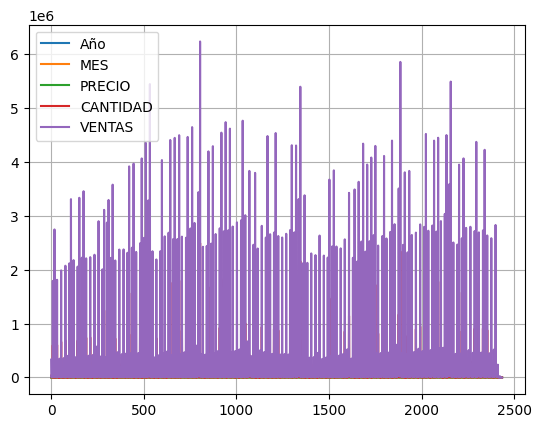

In [24]:
df.plot()
plt.grid()
plt.show()

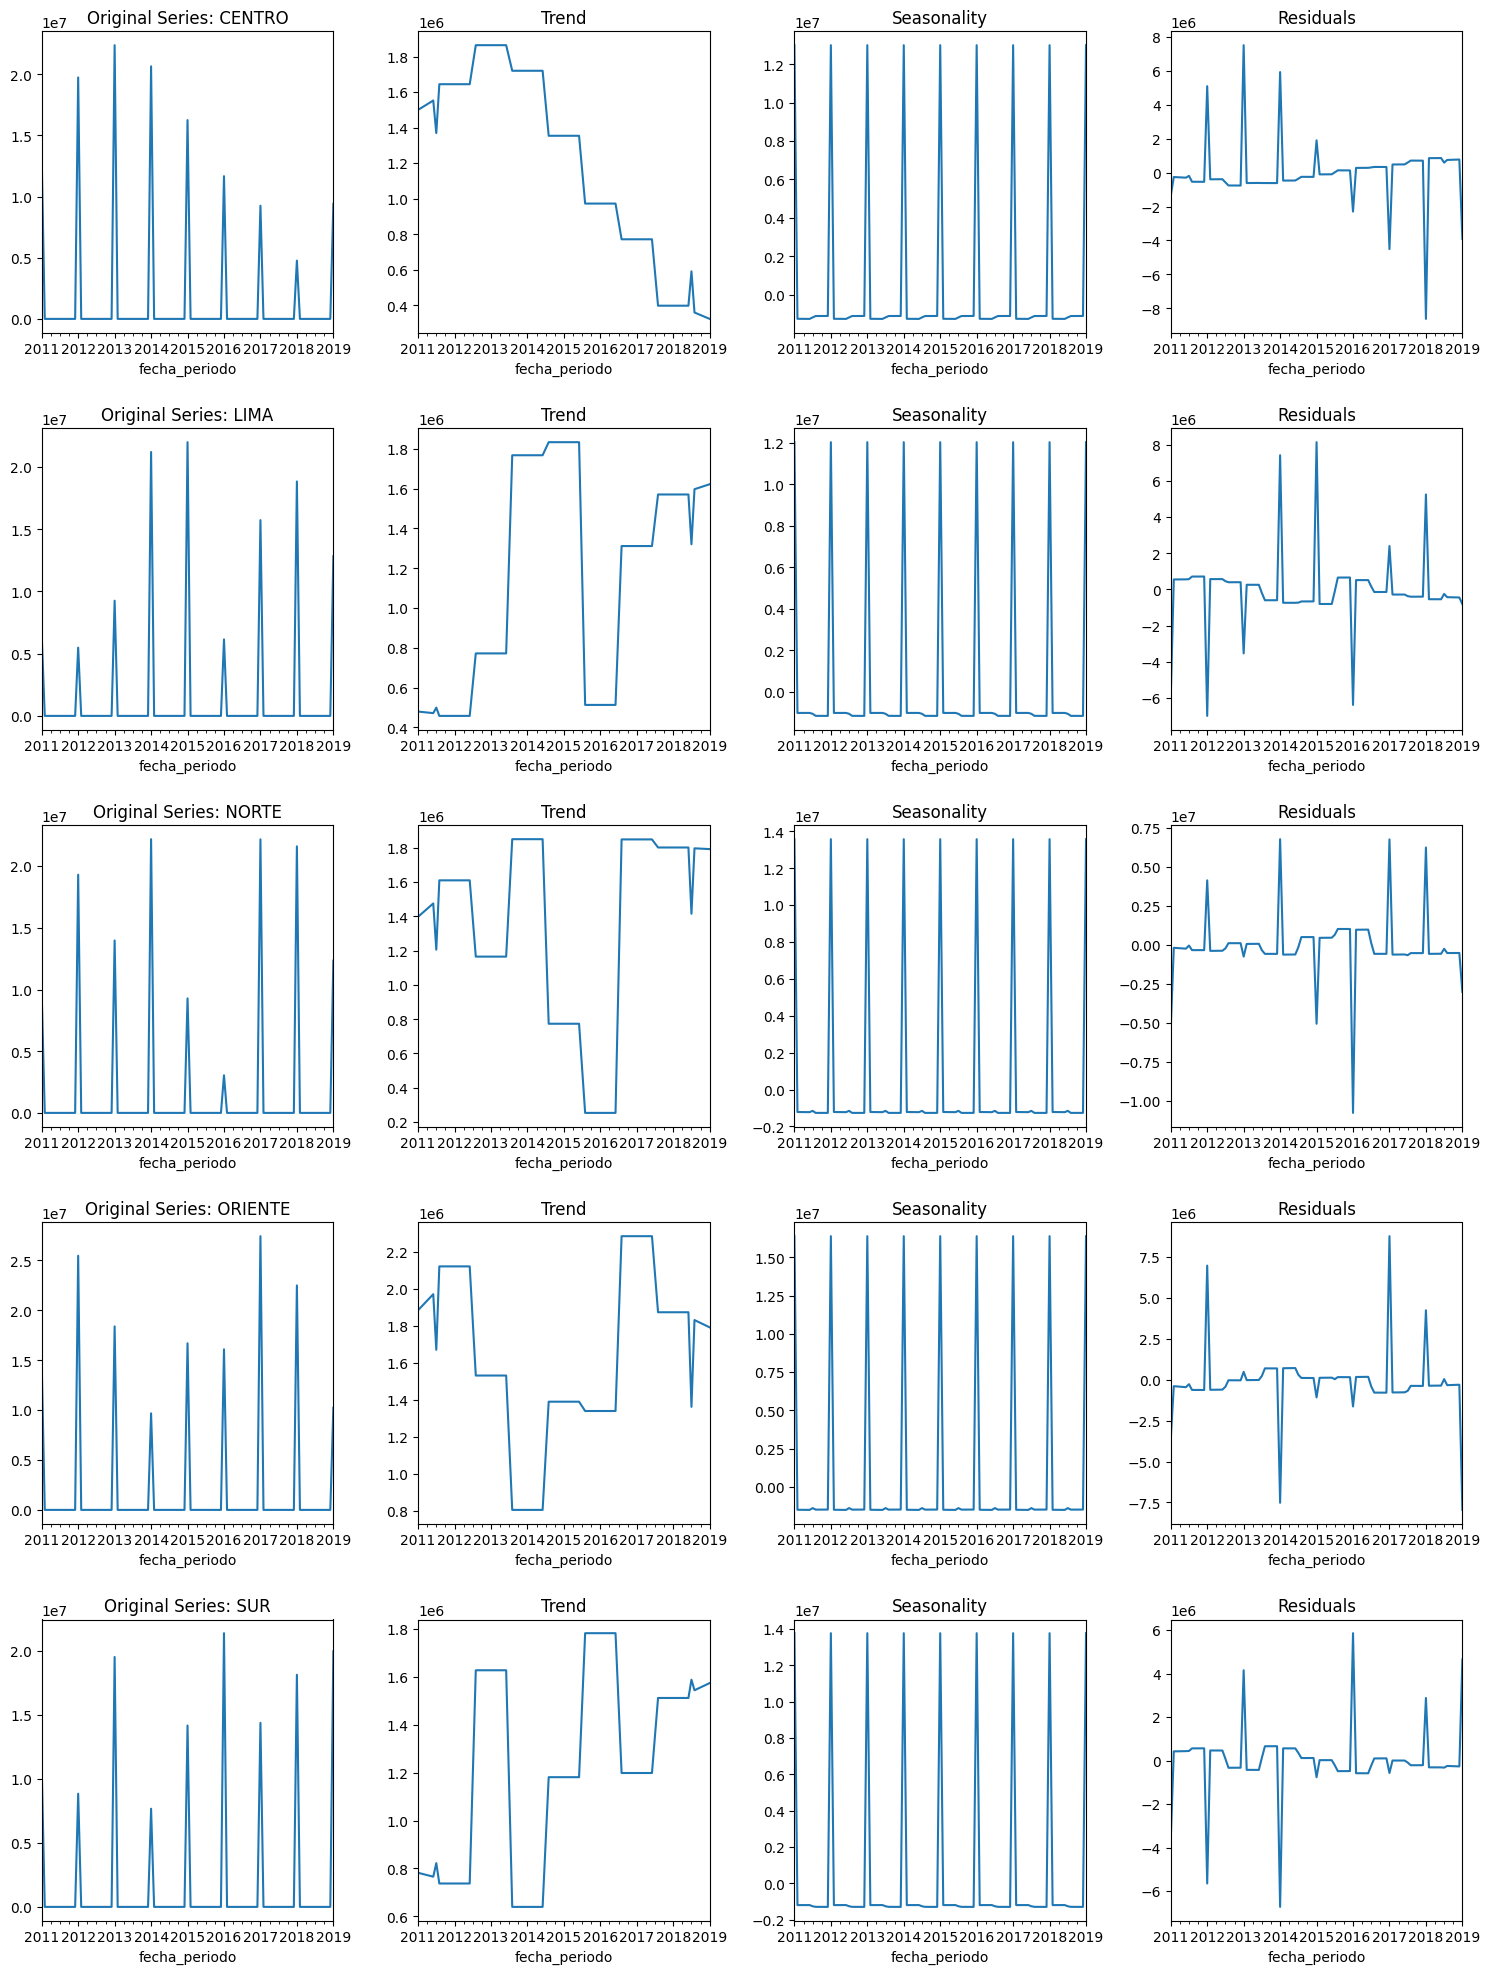

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Suponiendo que ya has cargado el DataFrame df desde el archivo Excel

# Convertir la columna 'fecha_periodo' a formato datetime y establecerla como índice
df['fecha_periodo'] = pd.to_datetime(df['fecha_periodo'])
df.set_index('fecha_periodo', inplace=True)

# Resamplear los datos a una frecuencia mensual por ZONA
df_resampled_zone = df.groupby('ZONA').resample('M')['VENTAS'].sum().unstack(level=0)

# Realizar la descomposición estacional con el modelo aditivo para cada ZONA y graficarla
fig, axes = plt.subplots(len(df_resampled_zone.columns), 4, figsize=(15, 20))

for i, zona in enumerate(df_resampled_zone.columns):
    decomposition = seasonal_decompose(df_resampled_zone[zona], model='additive', extrapolate_trend='freq')

    df_resampled_zone[zona].plot(ax=axes[i, 0], title='Original Series: ' + zona)
    decomposition.trend.plot(ax=axes[i, 1], title='Trend')
    decomposition.seasonal.plot(ax=axes[i, 2], title='Seasonality')
    decomposition.resid.plot(ax=axes[i, 3], title='Residuals')

plt.tight_layout()
plt.show()


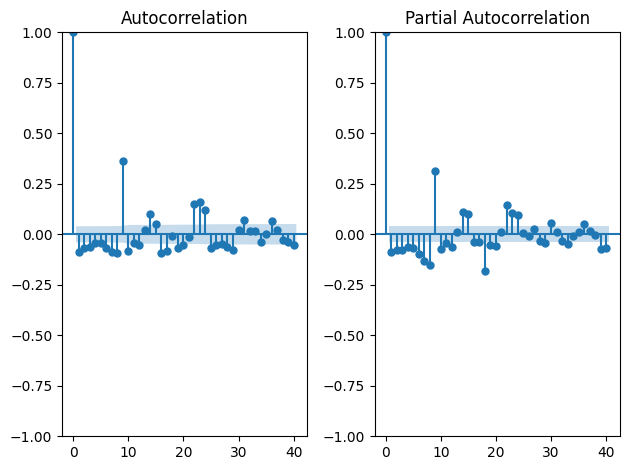

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2)

# Plot ACF
plot_acf(df['VENTAS'], lags=40, ax=axes[0])

# Plot PACF
plot_pacf(df['VENTAS'], lags=40, ax=axes[1])

plt.tight_layout()
plt.show()